<a href="https://colab.research.google.com/github/prxska/Ev3MachineLearning/blob/main/regresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Regresión Lineal Simple en CS:GO (Versión Local)

Este notebook muestra cómo aplicar un modelo de **regresión lineal simple** para predecir la `TravelledDistance` (distancia recorrida por un jugador en una ronda), utilizando como predictor el `RoundStartingEquipmentValue`.

Este archivo está preparado para ejecutarse de forma **local**, sin depender de Google Drive.

---

## 1. Carga y limpieza de datos

In [14]:
import pandas as pd
from google.colab import files

# Subir el archivo desde tu computadora
uploaded = files.upload()

# Get the name of the uploaded file
# files.upload() returns a dictionary where keys are filenames
uploaded_filename = list(uploaded.keys())[0]

# Cargar el CSV al DataFrame (usando el nombre del archivo subido)
# Use the actual uploaded_filename instead of the hardcoded name
df = pd.read_csv(uploaded_filename, sep=';')

# Limpiar columnas: convertir valores numéricos escritos como string
df['TravelledDistance'] = df['TravelledDistance'].astype(str).str.replace('.', '', regex=False)
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')
df['RoundStartingEquipmentValue'] = pd.to_numeric(df['RoundStartingEquipmentValue'], errors='coerce')

# Eliminar valores nulos
df = df.dropna(subset=['TravelledDistance', 'RoundStartingEquipmentValue'])

# Ver las primeras filas
df[['RoundStartingEquipmentValue', 'TravelledDistance']].head()

Saving Anexo_ET_demo_round_traces_2022.csv to Anexo_ET_demo_round_traces_2022.csv


<ipython-input-14-0fa6240777f3>:13: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(uploaded_filename, sep=';')


,RoundStartingEquipmentValue,TravelledDistance
0,750,1.008314e+16
1,800,6.096088e+16
2,1000,5.642252e+15
3,850,8.963473e+15
4,1000,1.086565e+16


## 2. Entrenamiento del modelo

In [19]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Definir X e y
X = df[['RoundStartingEquipmentValue']]
y = df['TravelledDistance']

# Separar entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo y entrenar
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## 3. Evaluación del modelo

In [20]:

from sklearn.metrics import mean_squared_error, r2_score

# Predicciones
y_pred = model.predict(X_test)

# Métricas
print("Error cuadrático medio (MSE):", mean_squared_error(y_test, y_pred))
print("Coeficiente de determinación (R^2):", r2_score(y_test, y_pred))


Error cuadrático medio (MSE): 1.665535215010874e+32
Coeficiente de determinación (R^2): 0.0001916774592763959


## 4. Visualización

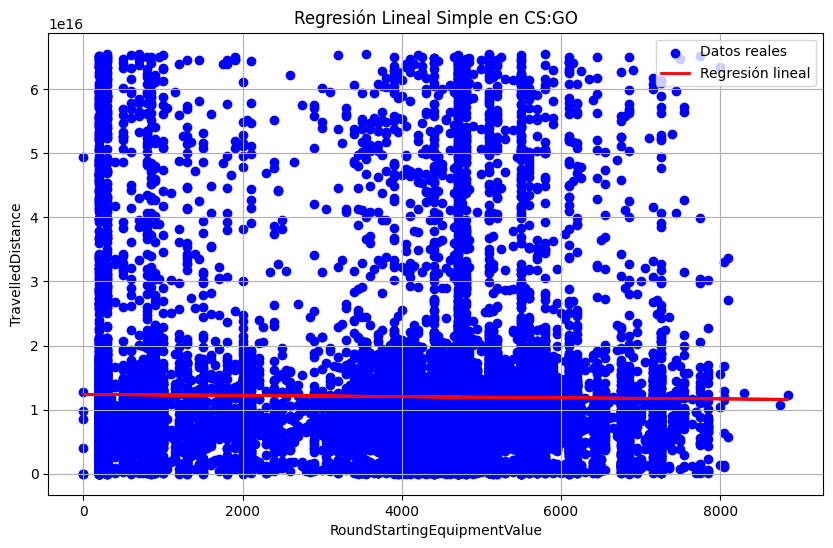

In [21]:


import matplotlib.pyplot as plt

# Gráfico de dispersión y línea de regresión

plt.figure(figsize=(10, 6))
# X_test and y_test should now be defined from the previous cell execution
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión lineal')
plt.xlabel('RoundStartingEquipmentValue')
plt.ylabel('TravelledDistance')
plt.title('Regresión Lineal Simple en CS:GO')
plt.legend()
plt.grid(True)
plt.show()